In [1]:
import esm
import torch

In [2]:
model, alphabet = esm.pretrained.load_model_and_alphabet('/home/rafsanjani/.cache/torch/hub/checkpoints/esm1v_t33_650M_UR90S_1.pt')

/home/rafsanjani/anaconda3/envs/compGeom/lib/python3.8/site-packages/esm/pretrained.py:174: UserWarning: Regression weights not found, predicting contacts will not produce correct results.
  warnings.warn(


In [4]:
# model

In [5]:
# alphabet

In [6]:
batch_converter = alphabet.get_batch_converter()

In [9]:
# batch_converter

In [7]:
model.eval()
print()

In [64]:
C=1
data = []
for header, seq in esm.data.read_fasta('/home/rafsanjani/backup-research/astral-scopedom-seqres-gd-sel-gs-bib-40-2.08.fa'):
    # print(seq.upper()[:1000])
    data.append((f'protein-{C}', seq.upper()[:1000]))
    if C==100: break
    C+=1
#end-for

In [66]:
# data

In [67]:
# data = [
#     ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
#     ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
# ]

In [68]:
batch_labels, batch_strs, batch_tokens = batch_converter(data)

In [69]:
import time

In [ ]:
begin = time.time()
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)
token_representations = results["representations"][33]

print(f'time elapsed: {time.time() - begin} seconds')

In [44]:
token_representations.shape

torch.Size([10, 174, 1280])

In [45]:
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))

In [46]:
sequence_representations

[tensor([-0.2596,  0.2808, -0.2111,  ..., -0.1121,  0.1269,  0.0815]),
 tensor([-0.2514,  0.3568, -0.1341,  ..., -0.1292,  0.0994,  0.1215]),
 tensor([-0.3944,  0.1892, -0.1090,  ..., -0.1395,  0.3195,  0.3391]),
 tensor([-0.3650,  0.1695, -0.1944,  ..., -0.0967,  0.2751,  0.1562]),
 tensor([-0.1810,  0.2022, -0.2158,  ..., -0.0242,  0.1305,  0.1017]),
 tensor([-0.1679,  0.0912, -0.2231,  ..., -0.0404,  0.0491,  0.0433]),
 tensor([-0.1556,  0.0834, -0.1422,  ..., -0.1388,  0.0578,  0.0723]),
 tensor([-0.1097,  0.1256, -0.1138,  ..., -0.0079, -0.0243,  0.0019]),
 tensor([-0.0631,  0.0760, -0.1432,  ..., -0.0546, -0.0105,  0.0116]),
 tensor([-0.1040,  0.1137, -0.1457,  ...,  0.0360,  0.0091,  0.0697])]

In [49]:
sequence_representations[0]

tensor([-0.2596,  0.2808, -0.2111,  ..., -0.1121,  0.1269,  0.0815])

In [58]:
V = []
for rep in sequence_representations:
    V.append(rep.detach().numpy())

In [61]:
import numpy as np
V = np.array(V)

In [63]:
V.shape

(10, 1280)

In [55]:
type(sequence_representations[0].detach().numpy())

numpy.ndarray

In [53]:
# sequence_representations[0].shape

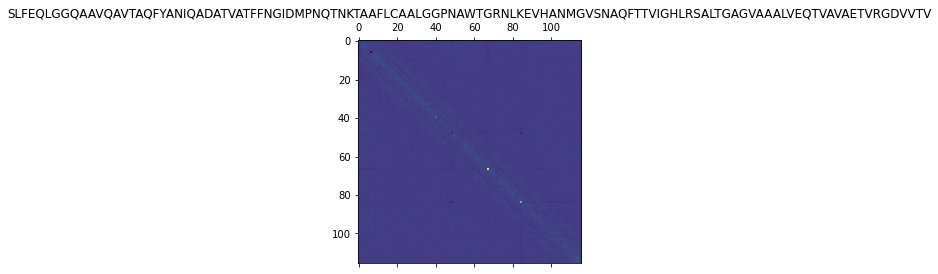

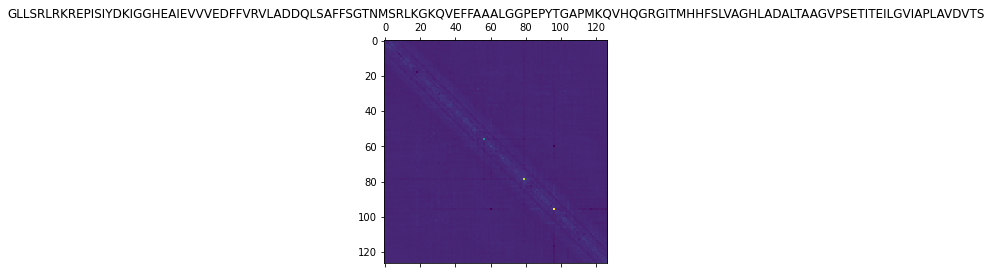

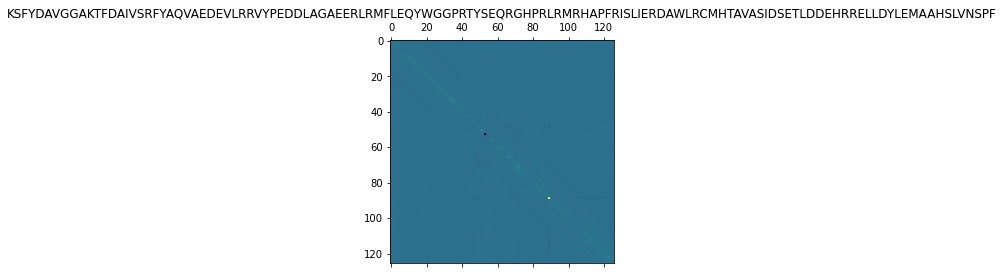

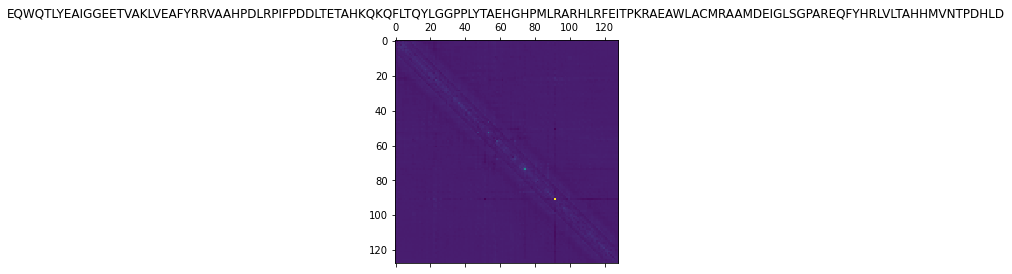

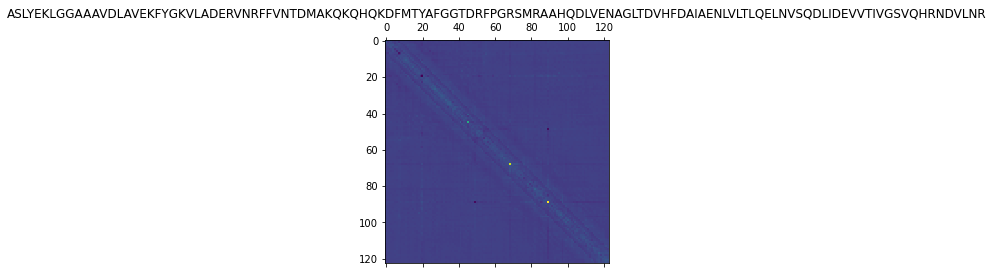

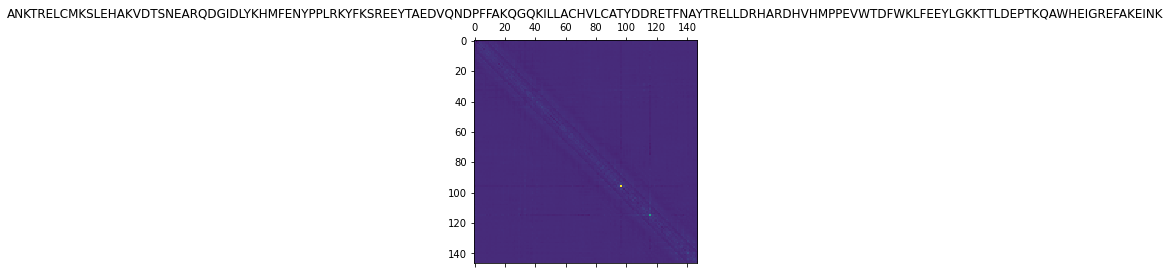

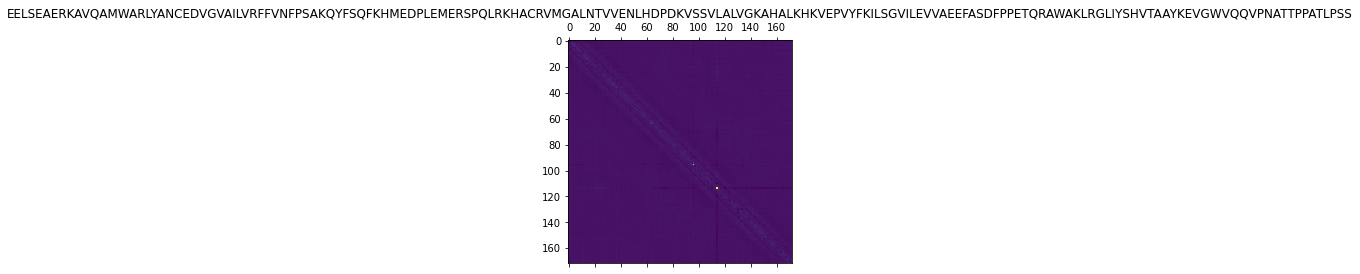

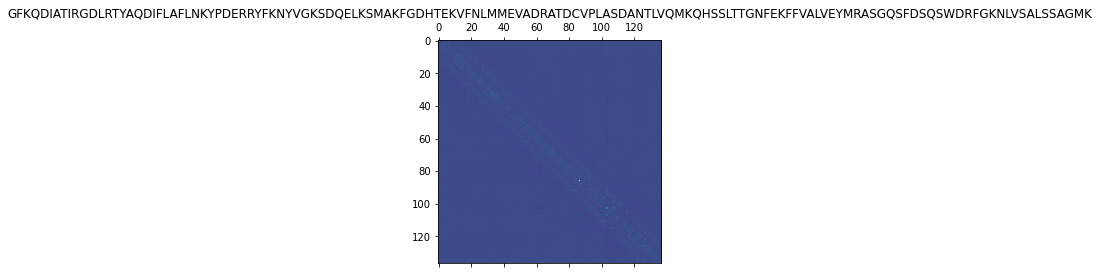

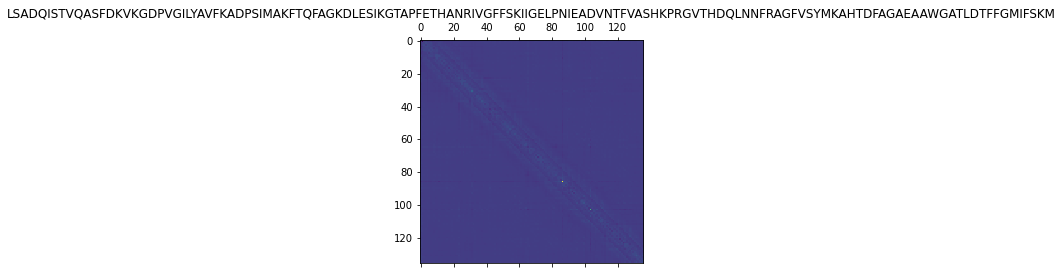

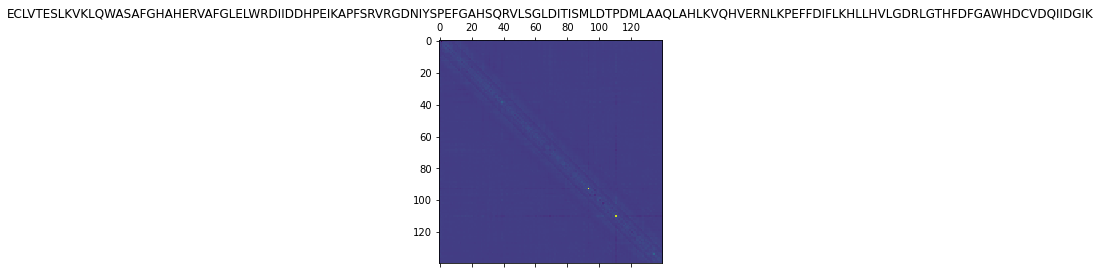

In [40]:
import matplotlib.pyplot as plt
for (_, seq), attention_contacts in zip(data, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)])
    plt.title(seq)
    plt.show()

In [29]:
model, alphabet = esm.pretrained.load_model_and_alphabet('/home/rafsanjani/.cache/torch/hub/checkpoints/esm_if1_gvp4_t16_142M_UR50.pt')

/home/rafsanjani/anaconda3/envs/compGeom/lib/python3.8/site-packages/esm/pretrained.py:174: UserWarning: Regression weights not found, predicting contacts will not produce correct results.
  warnings.warn(


In [30]:
batch_converter = alphabet.get_batch_converter()

In [31]:
model.eval()
print()

In [32]:
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPV--SGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQ--RLGFRSPNAAEEHLKALARKGVIEIVSGASRGE"),
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

In [35]:
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[20], return_contacts=True)
token_representations = results["representations"][20]

TypeError: forward() got an unexpected keyword argument 'repr_layers'

In [28]:
token_representations.shape

torch.Size([1, 2, 68, 768])

In [22]:
sequence_representations = []
for i, (_, seq) in enumerate(data):
    sequence_representations.append(token_representations[i, 1 : len(seq) + 1].mean(0))